
TensorFlow version: 2.15.0
Training Data: (50000, 32, 32, 3)
Testing Data: (10000, 32, 32, 3)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                        

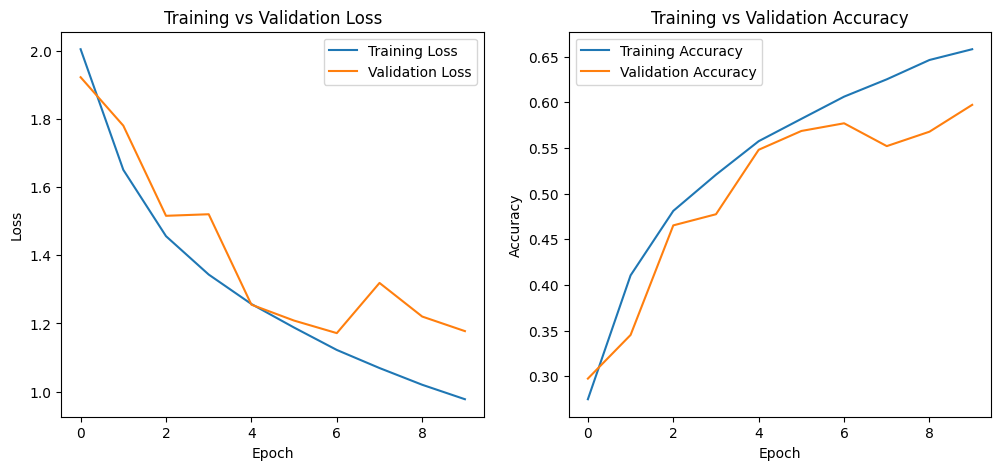

In [1]:
# --------------------------------------------------------
# 1. Import required packages
# --------------------------------------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("TensorFlow version:", tf.__version__)


# --------------------------------------------------------
# 2. Load and Preprocess CIFAR10 CSV Files
# --------------------------------------------------------

# Load CSV files
train = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/train_data.csv")
test = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/test_data.csv")


# Extract labels (first column)
y_train = train.pop("label").values
y_test = test.pop("label").values

# Pixel data (remaining 3072 columns)
x_train = train.values
x_test = test.values

# Reshape 3072 → 32×32×3
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255.0
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255.0

print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)


# --------------------------------------------------------
# 3. Build CNN Model for CIFAR10
# --------------------------------------------------------

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


# --------------------------------------------------------
# 4. Train the CNN model
# --------------------------------------------------------

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


# --------------------------------------------------------
# 5. Evaluate the model
# --------------------------------------------------------

loss, accuracy = model.evaluate(x_test, y_test)
print("✅ Test Loss:", loss)
print("✅ Test Accuracy:", accuracy)


# --------------------------------------------------------
# 6. Plot training loss and accuracy
# --------------------------------------------------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
